<a href="https://colab.research.google.com/github/PatrickFajardo/PatrickFajardo/blob/main/Assignments/assignment_04_FajardoPatrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8,5)


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [7]:
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/adviseinvest_historical_data.csv"

df = pd.read_csv(url)
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [9]:
df.describe(include="all")

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,27903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.546638,33766.893303,NaN,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,NaN,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,NaN,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,NaN,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,NaN,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,NaN,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

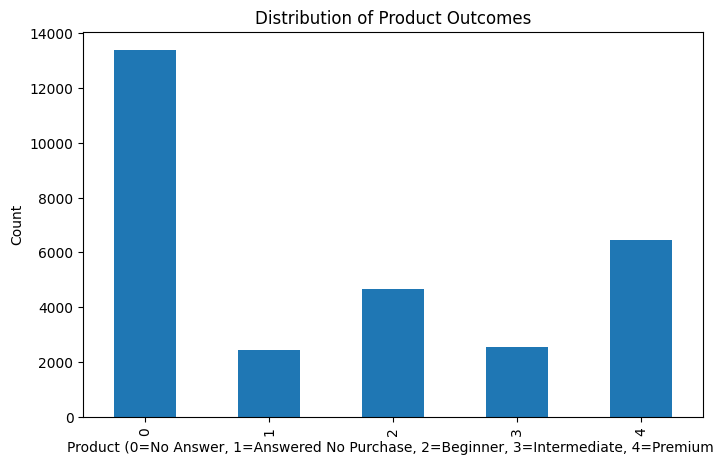

In [10]:
df['product'].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Product Outcomes")
plt.xlabel("Product (0=No Answer, 1=Answered No Purchase, 2=Beginner, 3=Intermediate, 4=Premium)")
plt.ylabel("Count")
plt.show()


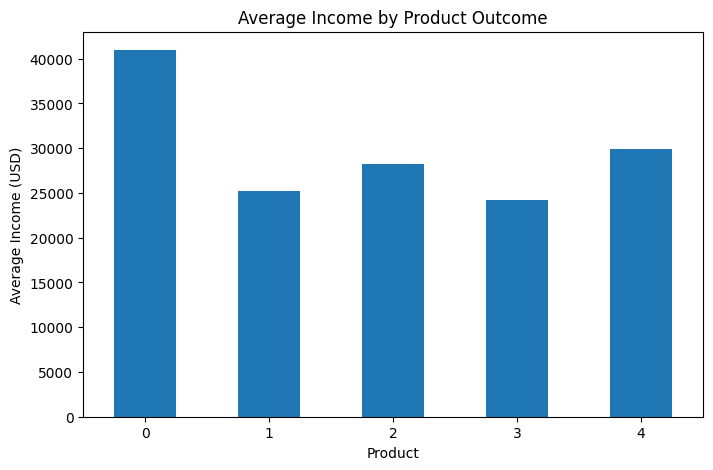

In [12]:
df.groupby("product")["income"].mean().plot(kind="bar")
plt.title("Average Income by Product Outcome")
plt.xlabel("Product")
plt.ylabel("Average Income (USD)")
plt.xticks(rotation=0)
plt.show()

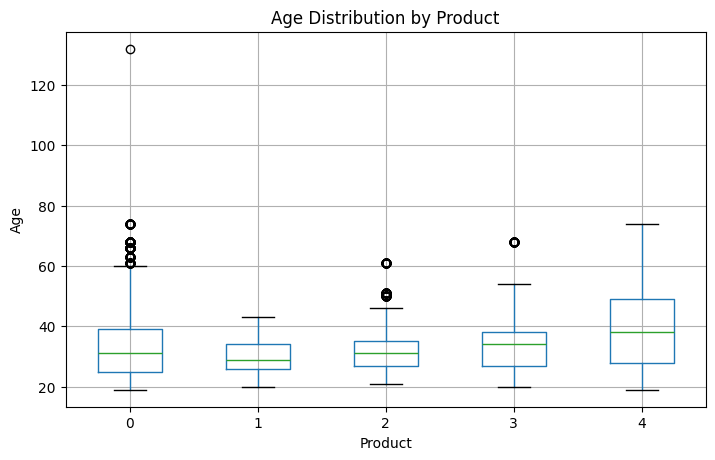

In [13]:
df.boxplot(column="age", by="product")
plt.title("Age Distribution by Product")
plt.suptitle("")
plt.xlabel("Product")
plt.ylabel("Age")
plt.xticks(rotation=0)
plt.show()

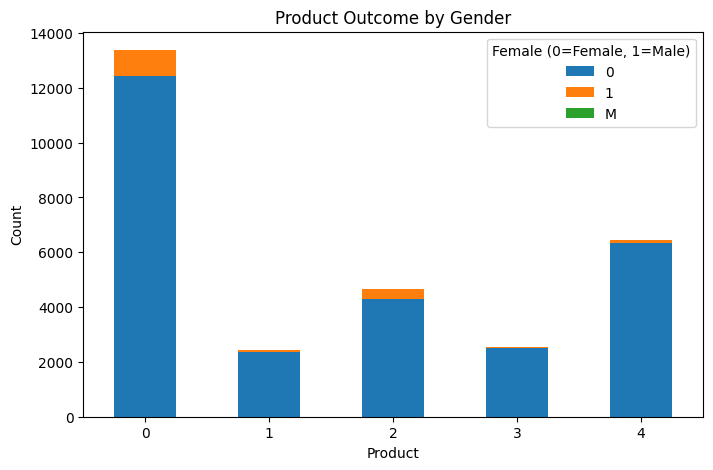

In [18]:
pd.crosstab(df["product"], df["female"]).plot(kind="bar", stacked=True)
plt.title("Product Outcome by Gender")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Female (0=Female, 1=Male)")
plt.xticks(rotation=0)
plt.show()

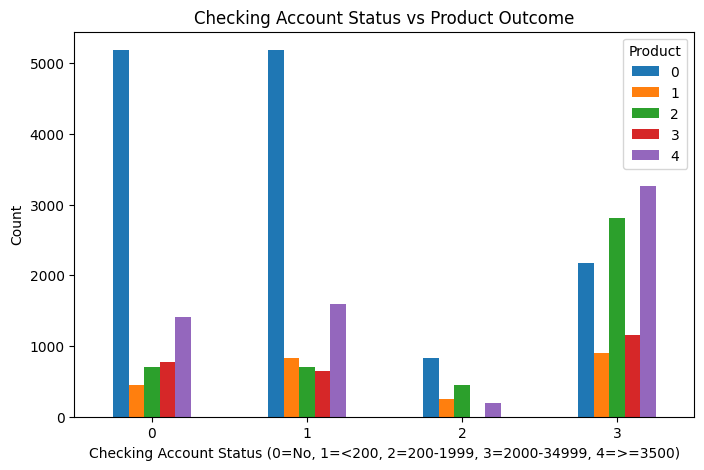

In [15]:
pd.crosstab(df["chk_acct"], df["product"]).plot(kind="bar")
plt.title("Checking Account Status vs Product Outcome")
plt.xlabel("Checking Account Status (0=No, 1=<200, 2=200-1999, 3=2000-34999, 4=>=3500)")
plt.ylabel("Count")
plt.legend(title="Product")
plt.xticks(rotation=0)
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

3.1: Are all of the variables useful and applicable to the business need?

The target variable in this dataset is **`product`**, which indicates whether the customer answered the sales call and if they purchased a product (Beginner, Intermediate, Premium).  

Most variables appear useful and relevant:  
- **Income, age, job, and number of dependents** are likely correlated with purchasing ability.  
- **Financial variables** such as `chk_acct` (checking account), `sav_acct` (savings account), and `num_accts` are strong indicators of financial stability and are therefore highly relevant.  
- **Binary indicators** like `rent`, `own_res`, `new_car`, and `mobile` may also influence the likelihood of answering or purchasing.  
- **Gender (female)** may have a weaker influence but could still provide insights.  

Overall, most of the variables are applicable to the business need, with financial indicators and income being the strongest predictors of product purchase.


**3.2: In what ways could the dataset be improved?**

- **Outliers:** The dataset contains unrealistic values (e.g., age = 132, number of accounts = 3345, negative income). These should be corrected or removed.  
- **Variable naming:** The column `female` is confusing, since `0 = Female` and `1 = Male`. Renaming it to `gender` with clear labels would avoid mistakes.  
- **Categorical encoding:** Some variables (`chk_acct`, `sav_acct`, `job`) are ordinal but stored as numbers. Converting them into labeled categories would make analysis more interpretable.  
- **Missing values:** A small number of missing values in `new_car` should be addressed (e.g., imputation).  
- **Class imbalance:** The target variable (`product`) shows a high number of “no purchase” cases. Rebalancing may be needed if this dataset is later used for modeling.  

Improving these issues will make the dataset more consistent, reliable, and easier to analyze.


## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [19]:
!jupyter nbconvert --to html "assignment_04_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_04_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 471471 bytes to assignment_04_FajardoPatrick.html
